# Expected Value
## or... How many licks does it take to get to the center of a lollipop?

Here we'll discuss the meaning of the expected value of a random variable and how I once thought it was just the snobby way of saying mean. The problem we'll study is predicting how many rolls of a die we will have to make until we roll the number 6. In theory, that number could be anywhere from 1 roll to an infinite ($\infty$) number of rolls. However, the expected value tells us the average number of rolls we will need to make in reality to get our first 6. As always with probability theory, you are welcome to roll a die and see if reality conforms to the results I'm about to discuss.

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [140]:
N = 6  # Number of equally likely outcomes (the dice roll could be 1 through 6)

In [141]:
p = 1 / N  # Chance of getting a 6 (works the same with the chance of getting any number 1-6)

In [142]:
q = 1 - p  # Probability of NOT getting a 6

## Calculate expected value of a random variable

The expected value is the weighted average of a random variable. The weights are just the probabilities of all outcomes that random variable can take. So expected value is the sum of all of the outcomes multiplied by the probability of those outcomes. In the special case where all outcomes are equally likely, then the expected value is just the typical mean (sum of all possible outcomes divided by count of all possible outcomes). So we now know that a mean is an expected value but an expected value is not necessarily a mean.

In [150]:
O = [1,2,3,4,5,6]   # All outcomes for the throw of one die

# To get the expected outcome, we multiply each possible outcome by its probability and then sum all products
E = 1*p + 2*p + 3*p + 4*p + 5*p + 6*p   # Expected value for any one throw of the die
print('I expect the value of {} to be seen the most for any given roll'.format(E))


I expect the value of 3.5 to be seen the most for any given roll


Now, of course, there's no 3.5 on the die. The expected value can be though of as the long-run average value of repetitions of the experiment it represents.

That explanation always hurts my head. So instead let's move this away from dice and into the real world to see the power of the expected value. 

Suppose you work for an insurance company. You suggest that premium of a home insurance policy should be set at \$500 per year. In the case of a fire, you recommend the insurance company to pay \$300,000 to the homeowner to rebuild the house. Will you make the insurance company money (and be a hero) or not (and be unemployed)?

This ends up being an expected value problem. The expected value in this case is the profit you expect to make given this insurance policy. Here are the two outcomes:

| Outcome | Profit for this Outcome ($) | Result |
|---------|--------| -- |
| Fire | -\$300,000 + \$500 = -\$299,500| No job? |
| No Fire | \$500 | Job! |

Note that in both cases we earn \$500, but in the case of the fire, we lose \$300,000. Oh boy! Will we lose our job. Well that depends on how likely the homes in this area catch fire. If the outcome is rare enough, then we are ok. If not, then we will need to increase the premium and/or decrease the pay out.

Now let's say that there are 200 fires every year out of every million houses in this area. (We can determine this from historical records.) So the probabiity of the fire is 0.0002 in any given year. 

| Outcome | Profit for this Outcome ($) | Probability of Happening |
|---------|--------|-------------|
| Fire | -\$300,000 + \$500 = -299,500| 0.0002 |
| No Fire | \$500 | 0.9998 |

Then, the expected profit from any one policy is:

$$ \$500 \times 0.9998 + (-\$300,000 + \$500) \times 0.0002 = \$440$$

So I expect to net +\$440 on the average policy. Now for any given policy I am either going to earn \$500 or lose \$299,500-- there are no other outcomes possible. So the \$440, like the 3.5 on our die, is not possible in any given case, but it is the average result of many, many trials. Another way of saying this is that if I insure one million houses (aka many, many trials), I'll make \$500 million dollars in premiums and pay out \$59.9 million in the loss of 200 houses due to fires.

Therefore, the average profit over all of my insurance policies is \$440. Of course, the more policies I write, the closer I should be to this expected value. If I write 1,000 policies, then I expect the company to net \$440 x 1,000 = \$440,000.

In [154]:
500*0.9998 + (-300000+500)*0.0002

440.0

## Scenario: How many throws of a fair die do I have to make until I see the 6?
In the case of rolling a die until a certain number appears, the random variable is the number of throws until we get to that number-- let's say that the target number is 6. So the random variable is the number of throws we have to make until the die shows a 6. Therefore, the random variable (number of throws) has outcomes from 1 (getting the 6 on the first throw) to $\infty$ (not getting the 6 for a long, long time). So the sum of all possible outcomes of rolls until we get a 6 *in theory* seems infinite. Does this mean that the expected value for the number of throws until we reach a 6 is unknownable? No. Remember, it is unlikely that we'll get the 6 on the first throw, but it is also much more unlikely that we'd have to wait 100,000 throws until we get the 6. So our intuition should be that the average number of throws should be somewhere in between. That's what the expected value equation is trying to calculate.

Total probability (area under the curve) is 0.9999999855103923


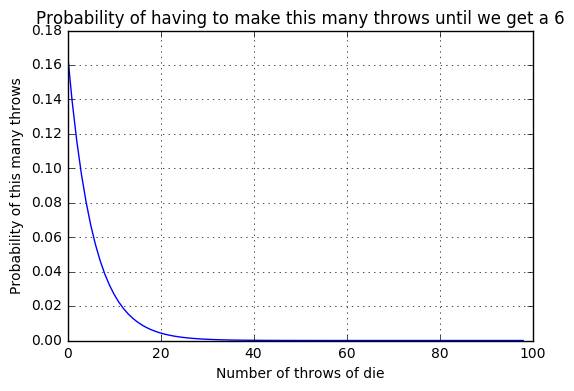

In [143]:
'''
Let's plot the number of throws until getting a 6 versus
the probability of having to make that many throws.
The equation for this is derived in the next cell.
'''
Pr = [ (q ** (n-1)) * p for n in range(1,100)] # 100 throws
plt.grid()
plt.plot(Pr)
plt.title('Probability of having to make this many throws until we get a 6')
plt.xlabel('Number of throws of die')
plt.ylabel('Probability of this many throws')
print ('Total probability (area under the curve) is {}'.format(sum(Pr)))

## So this plot shows that it is highly unlikely it would take more than 30 throws to get our first 6

Here we're calculating the expected number of throws we need until we get a 6. Let's run the thought experiment one throw at a time. You can follow the plot above to see the results.

_First throw:_
There's a $\frac{1}{6}$ chance of getting a 6 on the first throw. So we expect to get it on the first throw with a probability of : $\frac{1}{6} = 0.1666667$. 

_Second throw:_
If we get a 6 on the second throw then we couldn't have gotten a 6 on the first throw. So the probability of not getting a 6 on the first throw is $\frac{5}{6}$ and the probability of getting a 6 on the second throw is $\frac{1}{6}$. Each throw is independent so when we hear the word "AND", then we can multiply the probabilities. So the probability of getting the 6 on the second throw is the probability of not getting a 6 on the first throw AND getting a 6 on the second throw: $\frac{5}{6} \times \frac{1}{6} = 0.13889$

_Third throw:_
If we get a 6 on the third throw, then we couldn't have gotten a 6 on the first two throws. So the probability of not getting a 6 on the first two throws is $\frac{5}{6} \times \frac{5}{6} \times \frac{1}{6} = { \left ( \frac{5}{6} \right ) }^2 \times \frac{1}{6} = 0.11574$. 

_On the n-th throw:_ 
Following the same pattern, getting a 6 on the n-th throw has a probability of:

$\left ( \frac{5}{6} \right )^{(n-1)} \times \frac{1}{6}$

or

$\left ( q \right )^{(n-1)} \times p$, where $q = 1 - p$

So, for example, getting the 6 on the 10th throw should have a probability of:

$\left ( \frac{5}{6} \right )^{(10-1)} \times \frac{1}{6} = 0.0323011$

You should be able to verify this on the plot above.

5.999998478591144

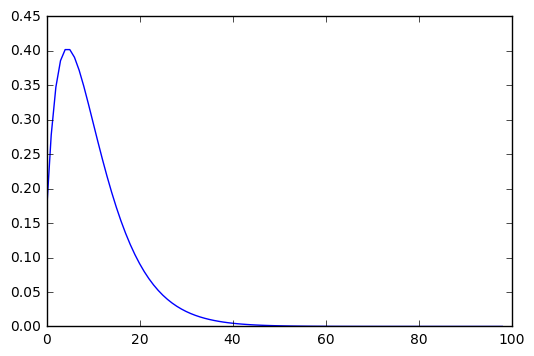

In [149]:
D = [ n*(q ** (n-1)) * p for n in range(1,100)] # 100 throws
plt.plot(D)
sum(D)

# Plotting the outcome times its probability

The expected outcome is defined as:

$$E = \sum_{n=1}^\infty {n P(n)}$$

So like the 3.5 and the \$440, this is the average value we'll get if we repeat the experiment many, many times. 

In the plot above, the curve represents $n P(n)$ and the area under the curve is $E$. To get the area under the curve, I can just sum the values. You can see the sum is almost 6.

So on average you'll need 6 throws to see your first 6. On any given trial, you may only need 1 throw to get a 6. On any other given trial, you may need 1,492 throws to get a 6. However, the most likely number of throws you'll need is 6.

In [145]:
E = np.cumsum(Pr)

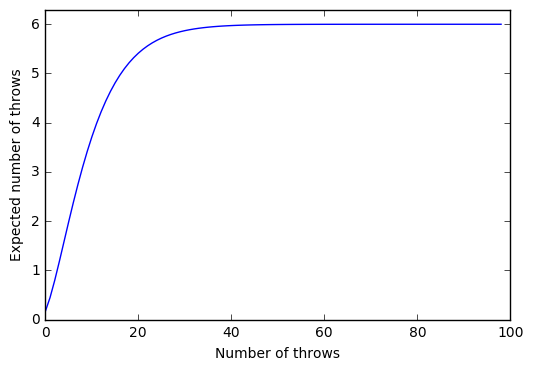

In [147]:
plt.plot(E) 
plt.ylim([0, N + 0.3])
plt.xlabel('Number of throws')
plt.ylabel('Expected number of throws')

# But wait. You only did up to 100 throws. There are an infinite number possible, right?

Sure. But as you can see in the plot above, the probability of needing lots of throws before you see your first 6 drops approaches zero very quickly. The area under the curve asymptomtically approach the theoretical value of 6. So even if we had an infinite amount of time to sum over all infinite possible outcomes, it would not change the answer.